# Novozymes Enzyme Stability Prediction
## Help identify the thermostable mutations in enzymes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Loading The Dataset

In [30]:
trainData = pd.read_csv('train.csv')
#update data
trainUpdates = pd.read_csv('train_updates_20220929.csv')
for seq_id in trainUpdates.seq_id:
    trainData = trainData.drop(index = seq_id)


In [31]:
trainData.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


## Data Profiling & Cleaning

In [32]:
trainData.shape

(28956, 5)

In [33]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28956 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            28956 non-null  int64  
 1   protein_sequence  28956 non-null  object 
 2   pH                28670 non-null  float64
 3   data_source       28001 non-null  object 
 4   tm                28956 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ MB


In [34]:
trainData.isnull().sum()

seq_id                0
protein_sequence      0
pH                  286
data_source         955
tm                    0
dtype: int64

In [35]:
trainData = trainData.dropna(subset=['pH'])

In [36]:
trainData.describe()

,seq_id,pH,tm
count,28670.000000,28670.000000,28670.000000
mean,15642.801779,6.872918,51.386024
std,9230.273904,0.792550,12.080801
min,0.000000,1.990000,25.100000
25%,7463.250000,7.000000,43.700000
50%,15456.500000,7.000000,48.800000
75%,23764.750000,7.000000,54.600000
max,31389.000000,11.000000,130.000000


## Exploratory Analysis and Visualization

<AxesSubplot:xlabel='tm', ylabel='Density'>

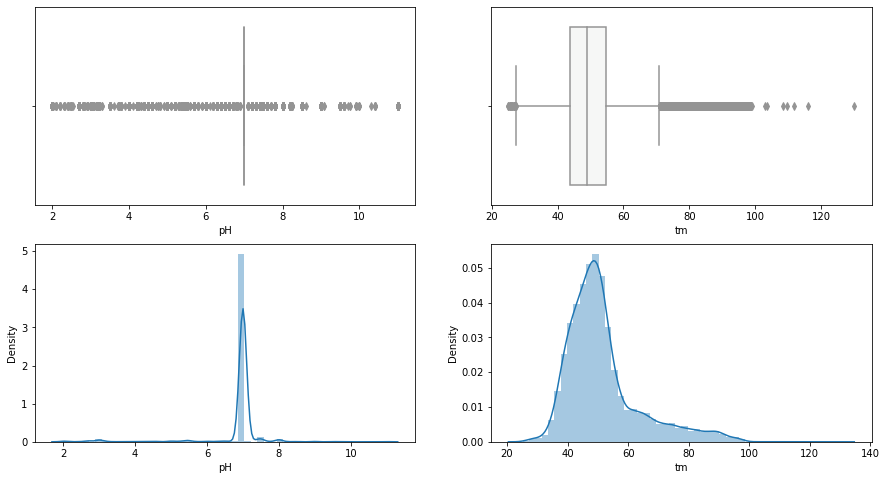

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(trainData['pH'], palette='PRGn', ax = ax[0, 0])
sns.distplot(trainData['pH'], ax = ax[1, 0])
sns.boxplot(trainData['tm'], palette='PRGn', ax = ax[0, 1])
sns.distplot(trainData['tm'], ax = ax[1, 1])